In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a simulator in 2D

In [7]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [8]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [9]:
def control(t, y):
    ### Circle Control Policy:
    #ux = -sin(t)
    #uy = cos(t)
    ### Ellipse Control Policy:
    #ux = -2*sqrt(3)*sin(t) - cos(t)
    #uy = -2*sin(t) + sqrt(3)*cos(t)
    ### Figure-Eight Control Policy:
    ux = (sin(t)**2 - (cos(t)**2) + cos(t))/sqrt(2)
    uy = (-(sin(t)**2) + cos(t)**2 + cos(t))/sqrt(2)
    ### Helix Control Policy:
    #uz = 1
    return array([ux, uy])
   

### Running the simulator

In [13]:
tf = 8.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

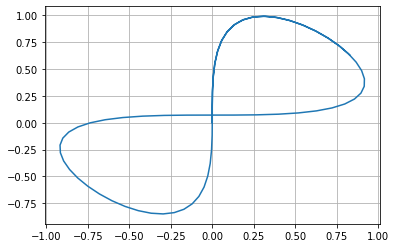

In [14]:
grid()
plot(x_log[:,0], x_log[:,1])

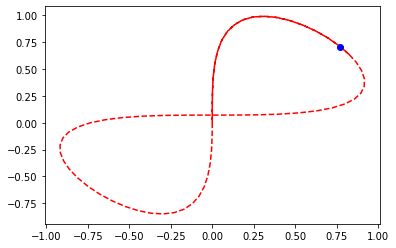

In [12]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())